In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('stroke.csv')

Understanding data

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.drop(columns='id', inplace=True)

In [5]:
df.shape

(5110, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Data Cleaning

In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

Missing values

In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [11]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
# Fix outliers in columns avg_glucose_level and bmi

Outlier Detection

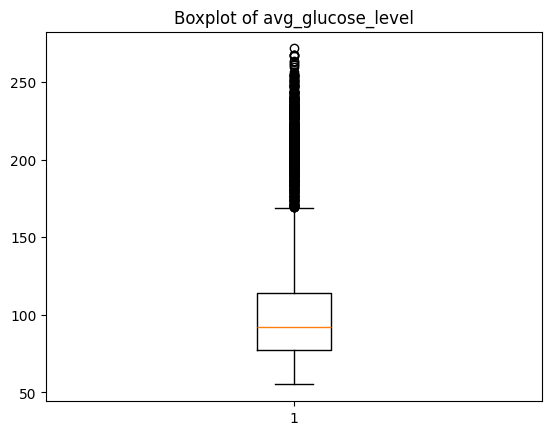

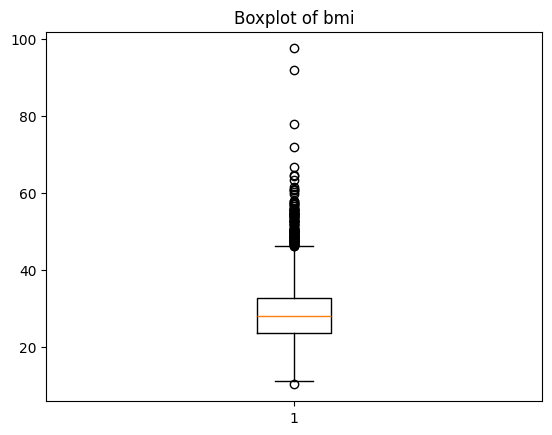

In [13]:
for col in ['avg_glucose_level', 'bmi']:
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [14]:
for col in ['avg_glucose_level', 'bmi']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1


#### Data Preprocessing

In [16]:
for col in df.columns:
    if df[col].dtype in ['object']: 
        print(f"\nValue counts for column '{col}':")
        print(df[col].value_counts())



Value counts for column 'gender':
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Value counts for column 'ever_married':
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Value counts for column 'work_type':
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Value counts for column 'Residence_type':
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Value counts for column 'smoking_status':
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [17]:
# Binary encode cols = gender, ever_married, Residence_type
# One hot encode cols = work_type, smoking_status

In [18]:
df['gender']=df['gender'].replace('Other','Male')

Label Encoding

In [19]:
binary_cols=['gender','ever_married','Residence_type']
le=LabelEncoder()
for col in binary_cols:
    df[col]=le.fit_transform(df[col])

One-Hot Encoding

In [20]:
df['work_type'] = df['work_type'].replace(['children', 'Never_worked'], 'non_worker')


In [21]:
df.shape

(5110, 11)

*Two ways to do One-Hot Encoding : Using pandas (pd.get_dummies()) and using Onehot Encoder Transformer*

In [22]:
df_alt=pd.get_dummies(df,columns=['work_type'], dtype='int', drop_first=True) # It's a function that doesn't learn the corresponding categorical value of the binaries generated from encoding. Not ideal for creating ML models worthy of deployments.

In [23]:
df_alt # Just to demo this method of using one-hot 

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Private,work_type_Self-employed,work_type_non_worker
0,1,67.0,0,1,1,1,169.3575,36.6,formerly smoked,1,1,0,0
1,0,61.0,0,0,1,0,169.3575,28.1,never smoked,1,0,1,0
2,1,80.0,0,1,1,0,105.9200,32.5,never smoked,1,1,0,0
3,0,49.0,0,0,1,1,169.3575,34.4,smokes,1,1,0,0
4,0,79.0,1,0,1,0,169.3575,24.0,never smoked,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.7500,28.1,never smoked,0,1,0,0
5106,0,81.0,0,0,1,1,125.2000,40.0,never smoked,0,0,1,0
5107,0,35.0,0,0,1,0,82.9900,30.6,never smoked,0,0,1,0
5108,1,51.0,0,0,1,0,166.2900,25.6,formerly smoked,0,1,0,0


*Now we're gonna do the encoding using OneHotEncoder transformer from scikit-learn library*

In [24]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(sparse_output=False, drop='first')

In [25]:
res=onehot.fit_transform(df[['work_type']])
onehot.get_feature_names_out() # outputs the categorical values corresponding to the encoded vectors that forms the feature matrix.

array(['work_type_Private', 'work_type_Self-employed',
       'work_type_non_worker'], dtype=object)

In [26]:
df.drop(columns='work_type', inplace=True)

In [27]:
df.shape

(5110, 10)

In [28]:
res  # It's dense array. Cannot join it into a data frame directly.# type: ignore
res=pd.DataFrame(res, columns=onehot.get_feature_names_out())

In [29]:
res # Now it's a data frame. Let's join it into the original df.

,work_type_Private,work_type_Self-employed,work_type_non_worker
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
5105,1.0,0.0,0.0
5106,0.0,1.0,0.0
5107,0.0,1.0,0.0
5108,1.0,0.0,0.0


In [30]:
df.reset_index(drop=True, inplace=True) # Not actually necessary in this case, but standard practice when joining columns.

In [31]:
df.join(res)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Private,work_type_Self-employed,work_type_non_worker
0,1,67.0,0,1,1,1,169.3575,36.6,formerly smoked,1,1.0,0.0,0.0
1,0,61.0,0,0,1,0,169.3575,28.1,never smoked,1,0.0,1.0,0.0
2,1,80.0,0,1,1,0,105.9200,32.5,never smoked,1,1.0,0.0,0.0
3,0,49.0,0,0,1,1,169.3575,34.4,smokes,1,1.0,0.0,0.0
4,0,79.0,1,0,1,0,169.3575,24.0,never smoked,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.7500,28.1,never smoked,0,1.0,0.0,0.0
5106,0,81.0,0,0,1,1,125.2000,40.0,never smoked,0,0.0,1.0,0.0
5107,0,35.0,0,0,1,0,82.9900,30.6,never smoked,0,0.0,1.0,0.0
5108,1,51.0,0,0,1,0,166.2900,25.6,formerly smoked,0,1.0,0.0,0.0


In [32]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [33]:
df.loc[(df['smoking_status']=='Unknown')&(df['stroke']==1),'smoking_status']='smokes'

In [34]:
df.loc[(df['smoking_status']=='Unknown')&(df['stroke']==0),'smoking_status']='formerly smoked'

In [35]:
from sklearn.preprocessing import OrdinalEncoder
ordinal=OrdinalEncoder(categories=[['never smoked', 'formerly smoked', 'smokes']])

In [36]:
df['smoking_status']=ordinal.fit_transform(df[['smoking_status']])

In [37]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,169.3575,36.6,1.0,1
1,0,61.0,0,0,1,0,169.3575,28.1,0.0,1
2,1,80.0,0,1,1,0,105.9200,32.5,0.0,1
3,0,49.0,0,0,1,1,169.3575,34.4,2.0,1
4,0,79.0,1,0,1,0,169.3575,24.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.7500,28.1,0.0,0
5106,0,81.0,0,0,1,1,125.2000,40.0,0.0,0
5107,0,35.0,0,0,1,0,82.9900,30.6,0.0,0
5108,1,51.0,0,0,1,0,166.2900,25.6,1.0,0


Sampling

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [39]:
df[['stroke']].value_counts()

stroke
0         4861
1          249
Name: count, dtype: int64

In [40]:
pipe = Pipeline(steps=[
    ('oversampling', SMOTE(sampling_strategy={1: 1000})),
    ('undersampling', RandomUnderSampler(sampling_strategy={0: 1000}))
])


In [41]:
X=df.drop(columns=['stroke'])
y=df['stroke']

In [42]:
X_sampled, y_sampled=pipe.fit_resample(X,y)

In [43]:
X_sampled.value_counts()

gender  age        hypertension  heart_disease  ever_married  Residence_type  avg_glucose_level  bmi        smoking_status
0       61.000000  0             0              1             0               169.357500         28.100000  0.000000          2
        0.320000   0             0              0             1               108.630000         19.600000  1.000000          1
        0.720000   0             0              0             0               62.130000          16.800000  1.000000          1
        1.080000   0             0              0             0               60.530000          17.500000  1.000000          1
                                                              1               159.390000         12.800000  1.000000          1
                                                                                                                             ..
1       81.000000  0             0              1             1               169.357500         29.000000  1

In [44]:
y_sampled.value_counts()

stroke
0    1000
1    1000
Name: count, dtype: int64

In [45]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,169.3575,36.6,1.0,1
1,0,61.0,0,0,1,0,169.3575,28.1,0.0,1
2,1,80.0,0,1,1,0,105.9200,32.5,0.0,1
3,0,49.0,0,0,1,1,169.3575,34.4,2.0,1
4,0,79.0,1,0,1,0,169.3575,24.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.7500,28.1,0.0,0
5106,0,81.0,0,0,1,1,125.2000,40.0,0.0,0
5107,0,35.0,0,0,1,0,82.9900,30.6,0.0,0
5108,1,51.0,0,0,1,0,166.2900,25.6,1.0,0


Scaling

In [46]:
minmax=MinMaxScaler()
X_scaled=minmax.fit_transform(X_sampled)


In [47]:
X_scaled

array([[0.        , 0.98776908, 0.        , ..., 0.38750959, 0.44314869,
        0.        ],
       [1.        , 0.44960861, 0.        , ..., 0.10623425, 0.68804665,
        0.5       ],
       [0.        , 0.8165362 , 0.        , ..., 0.4834009 , 0.37609329,
        0.        ],
       ...,
       [0.        , 0.93593975, 0.        , ..., 1.        , 0.61528915,
        0.        ],
       [0.        , 0.92740209, 0.        , ..., 1.        , 0.62851729,
        0.        ],
       [0.        , 0.88420855, 0.        , ..., 1.        , 0.47715584,
        0.46710904]], shape=(2000, 9))

Splitting

In [48]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y_sampled, test_size=0.3)

Model Selection

KNeighborsClassifier()
81.33333333333333
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       291
           1       0.79      0.87      0.83       309

    accuracy                           0.81       600
   macro avg       0.82      0.81      0.81       600
weighted avg       0.82      0.81      0.81       600



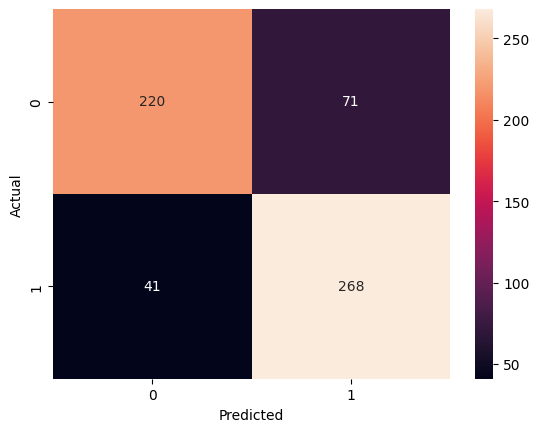

____________________________________
SVC()
79.5
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       291
           1       0.77      0.86      0.81       309

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.79       600



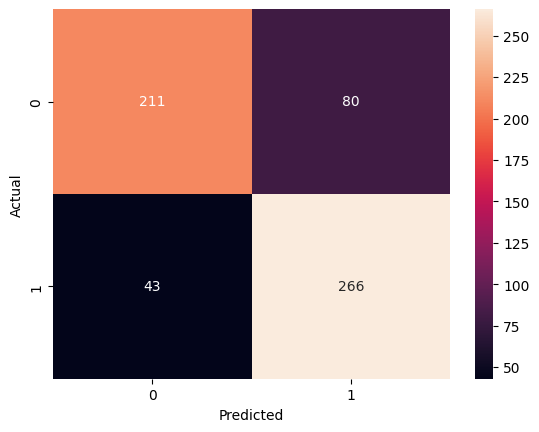

____________________________________
GaussianNB()
73.33333333333333
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       291
           1       0.73      0.78      0.75       309

    accuracy                           0.73       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.73      0.73      0.73       600



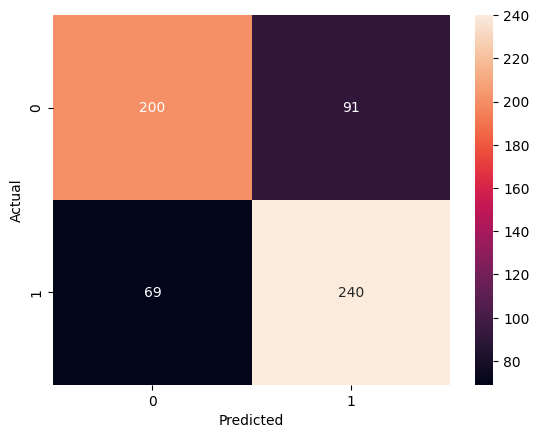

____________________________________
DecisionTreeClassifier()
85.0
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       291
           1       0.85      0.86      0.86       309

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



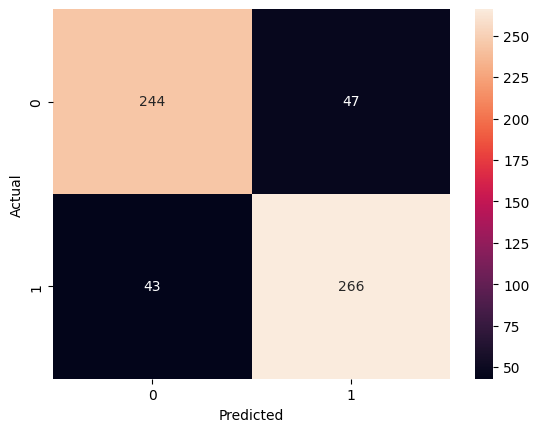

____________________________________


In [49]:
models=[KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier()]
for model in models:
    print(model)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(accuracy_score(y_test, y_pred)*100)
    print(classification_report(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("____________________________________")

In [50]:
best_model=DecisionTreeClassifier()
best_model.fit(X_train,y_train)

DecisionTreeClassifier()

Inference

In [51]:
best_model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,

ROC Curve

In [53]:
from sklearn.metrics import roc_curve, auc

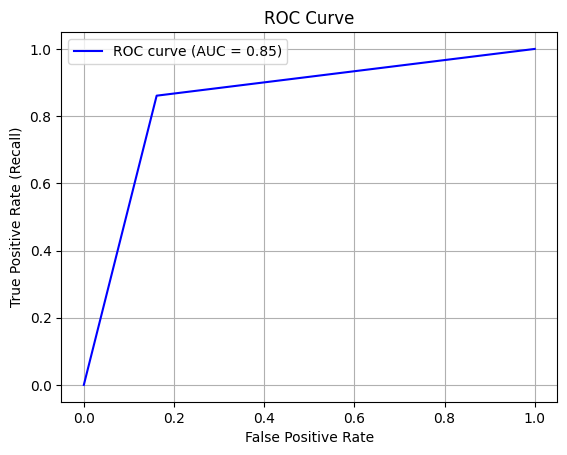

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()